In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('processed_titanic.csv')
print("Размер датасета:", df.shape)
print(df.head())
print("\nИнформация о данных:")
df.info()

Размер датасета: (891, 18)
   PassengerId  Survived  Pclass       Age     SibSp     Parch      Fare  \
0            1         0       3 -0.497793  0.432793 -0.473674 -0.502445   
1            2         1       1  0.715048  0.432793 -0.473674  0.786845   
2            3         1       3 -0.194583 -0.474545 -0.473674 -0.488854   
3            4         1       1  0.487640  0.432793 -0.473674  0.420730   
4            5         0       3  0.487640 -0.474545 -0.473674 -0.486337   

   Sex_male  Embarked_Q  Embarked_S  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0      True       False        True    False    False    False    False   
1     False       False       False    False     True    False    False   
2     False       False        True    False    False    False    False   
3     False       False        True    False     True    False    False   
4      True       False        True    False    False    False    False   

   Cabin_F  Cabin_G  Cabin_T  Cabin_U  
0    False    False    Fa

In [2]:
# ЗАДАНИЕ 1: Разделение датасета на обучающую и тестовую выборки

# Для регрессии: предсказание возраста (Age)
X_reg = df.drop(['Age', 'Survived'], axis=1)  # Исключаем целевые переменные
y_reg = df['Age']

# Для классификации: предсказание выживания (Survived)
X_clf = df.drop(['Survived', 'Age'], axis=1)  # Исключаем целевые переменные
y_clf = df['Survived']

# Разделение для регрессии
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42)
X_reg_test, X_reg_val, y_reg_test, y_reg_val = train_test_split(X_reg_test, y_reg_test, test_size=0.4, random_state=42)

# Разделение для классификации
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.4, random_state=42)
X_clf_test, X_clf_val, y_clf_test, y_clf_val = train_test_split(X_clf_test, y_clf_test, test_size=0.4, random_state=42)

print("Размеры выборок для регрессии:")
print(f"Обучающая: {X_reg_train.shape}, Тестовая: {X_reg_test.shape}, Валидационная: {X_reg_val.shape}")
print("\nРазмеры выборок для классификации:")
print(f"Обучающая: {X_clf_train.shape}, Тестовая: {X_clf_test.shape}, Валидационная: {X_clf_val.shape}")

Размеры выборок для регрессии:
Обучающая: (534, 16), Тестовая: (214, 16), Валидационная: (143, 16)

Размеры выборок для классификации:
Обучающая: (534, 16), Тестовая: (214, 16), Валидационная: (143, 16)


ОЦЕНКА МОДЕЛИ РЕГРЕССИИ:
MSE: 0.8386
RMSE: 0.9158
MAE: 0.6768


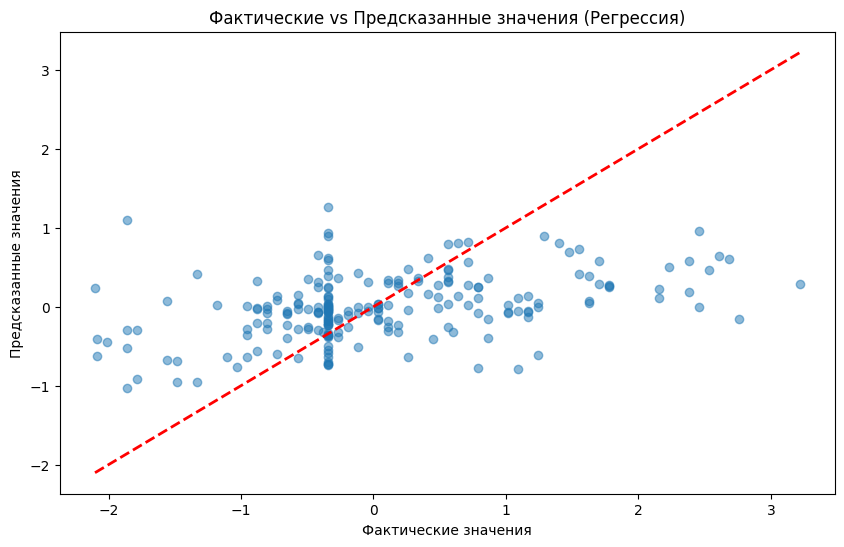


ВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ РЕГРЕССИИ:
       feature  importance
13     Cabin_G    1.254285
12     Cabin_F    1.142160
15     Cabin_U    0.605325
8      Cabin_B    0.483843
11     Cabin_E    0.411837
9      Cabin_C    0.346630
1       Pclass    0.324462
7   Embarked_S    0.318986
10     Cabin_D    0.238625
5     Sex_male    0.216866


In [3]:
# ЗАДАНИЕ 2: Решение задачи регрессии для признака Age, ЗАДАНИЕ 3: Оценка регрессионной модели
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error 
import matplotlib.pyplot as plt
import seaborn as sns

# Создание и обучение линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_reg_train, y_reg_train)

# Предсказание на тестовой выборке
y_reg_pred = linear_model.predict(X_reg_test)

# Оценка модели регрессии
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = root_mean_squared_error(y_reg_test, y_reg_pred)
mae = mean_absolute_error(y_reg_test, y_reg_pred)

print("ОЦЕНКА МОДЕЛИ РЕГРЕССИИ:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения (Регрессия)')
plt.show()

# Анализ важности признаков
feature_importance = pd.DataFrame({
    'feature': X_reg.columns,
    'importance': abs(linear_model.coef_)
}).sort_values('importance', ascending=False)

print("\nВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ РЕГРЕССИИ:")
print(feature_importance.head(10))

In [4]:
# Применение L1 и L2 регуляризации
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_reg_train, y_reg_train)
y_ridge_pred = ridge_model.predict(X_reg_test)
ridge_mse = mean_squared_error(y_reg_test, y_ridge_pred)

print(f"\nСравнение с Ridge регрессией:")
print(f"Linear Regression MSE: {mse:.4f}")
print(f"Ridge Regression MSE: {ridge_mse:.4f}")


Сравнение с Ridge регрессией:
Linear Regression MSE: 0.8386
Ridge Regression MSE: 0.8291


ОЦЕНКА МОДЕЛИ КЛАССИФИКАЦИИ:
Accuracy: 0.7664


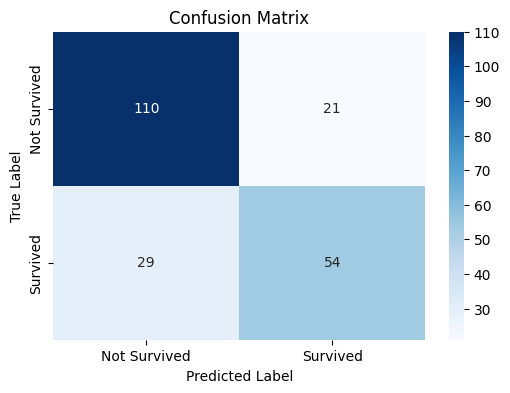


ПОЛНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

Not Survived       0.79      0.84      0.81       131
    Survived       0.72      0.65      0.68        83

    accuracy                           0.77       214
   macro avg       0.76      0.75      0.75       214
weighted avg       0.76      0.77      0.76       214



In [5]:
# ЗАДАНИЕ 4: Решение задачи классификации, ЗАДАНИЕ 5: Оценка классификационной модели
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Создание и обучение логистической регрессии
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_clf_train, y_clf_train)

# Предсказание на тестовой выборке
y_clf_pred = logreg_model.predict(X_clf_test)
y_clf_prob = logreg_model.predict_proba(X_clf_test)[:, 1]  # Вероятности для класса 1

# Оценка модели классификации
accuracy = accuracy_score(y_clf_test, y_clf_pred)

print("ОЦЕНКА МОДЕЛИ КЛАССИФИКАЦИИ:")
print(f"Accuracy: {accuracy:.4f}")

# Матрица ошибок
cm = confusion_matrix(y_clf_test, y_clf_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Полный отчет классификации
print("\nПОЛНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:")
print(classification_report(y_clf_test, y_clf_pred, 
                          target_names=['Not Survived', 'Survived']))